# IMS_1.01
- **Description** : Etude descriptive d'une variable quantitative discrète (avec pondération)
- **Source** : Introduction à la méthode statistique - Catherine Pardoux  
- **Chapitre** :  1 - Distributions statistiques à un caractère
- **Exercice** : 1.1  

## Énoncé
![Enonce IMS_1.01]((../images/Enonces/IMS_1.01_enonce.PNG))

## Question 1
- Population : formée des 5 sous-populations (non disjointes) de l’ensemble des familles en France en 1968, 1975, 1982, 1990 et 1999 .
- Unité statistique : une famille parmi cet ensemble de familles .
- Caractère étudié : nombre d’enfants de 0 à 18 ans en milliers
- Nature du caractère : caractère quantitatif discret.

In [2]:
from pathlib import Path

import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import math

DATA = "exercice1.CSV"

In [11]:
donnees = pd.read_csv(DATA, index_col=0)
donnees

,1968,1975,1982,1990,1999
Ensemble,12063,13176,14119,15391,16097
sans enfant,5302,5836,6508,7900,8679
avec enfants,6760,7340,7610,7491,7418
1 enfant,2723,3110,3303,3281,3317
2 enfants,2052,2374,2734,2756,2772
3 enfants,1063,1088,1081,1063,1008
4 enfants,481,427,310,259,230
5 enfantsouplus,441,342,183,132,91
Nombre total d'enfants,14569,14826,14294,13748,13308


## Question 2
Le nombre total de familles, le nombre de familles sans enfant, le nombre de familles avec 1 enfant, le nombre de familles avec 2 enfants augmentent au cours de la période 1968-1999, tandis que le nombre de familles de 4 enfants et le nombre de familles de5 enfants ou plus diminuent. Le nombre total d’enfants augmente de 1968 à 1975, etdiminue ensuite

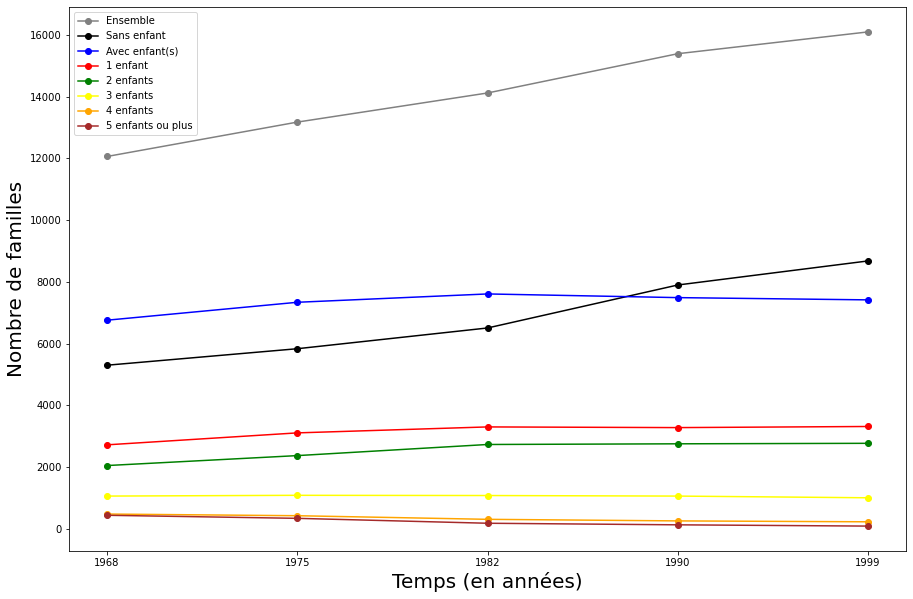

In [12]:
x = donnees.columns.values
y = donnees.values[0:8]
plt.figure(1, figsize=(15, 10))
plt.plot( x, y[0], marker='o', color='gray', label="Ensemble")
plt.plot( x, y[1], marker='o', color='black', label="Sans enfant")
plt.plot( x, y[2], marker='o', color='blue', label="Avec enfant(s)")
plt.plot( x, y[3], marker='o', color='red', label="1 enfant")
plt.plot( x, y[4], marker='o', color='green', label="2 enfants")
plt.plot( x, y[5], marker='o', color='yellow', label="3 enfants" )
plt.plot( x, y[6], marker='o', color='orange', label="4 enfants")
plt.plot( x, y[7], marker='o', color='brown', label="5 enfants ou plus")
plt.xlabel("Temps (en années)", fontsize=20)
plt.ylabel("Nombre de familles", fontsize=20)
plt.legend()

## Question 3

### Question 3.1

###### 1968 #######
1 enfant | 40.281065088757394 %
2 enfants | 30.355029585798814 %
3 enfants | 15.724852071005918 %
4 enfants | 7.115384615384615 %
5 enfants ou plus | 6.523668639053254 %


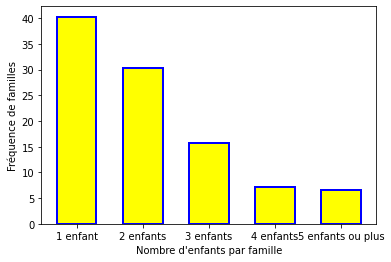

Le mode de la population de l'ensemble des familles en 1968 est : 1 enfant
###### 1975 #######
1 enfant | 42.370572207084464 %
2 enfants | 32.3433242506812 %
3 enfants | 14.822888283378747 %
4 enfants | 5.817438692098093 %
5 enfants ou plus | 4.659400544959128 %


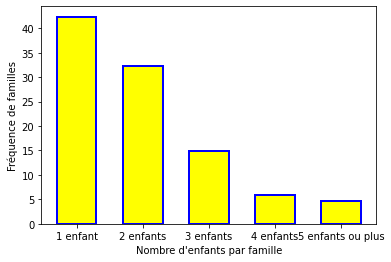

Le mode de la population de l'ensemble des familles en 1975 est : 1 enfant
###### 1982 #######
1 enfant | 43.40341655716163 %
2 enfants | 35.92641261498029 %
3 enfants | 14.204993429697765 %
4 enfants | 4.07358738501971 %
5 enfants ou plus | 2.40473061760841 %


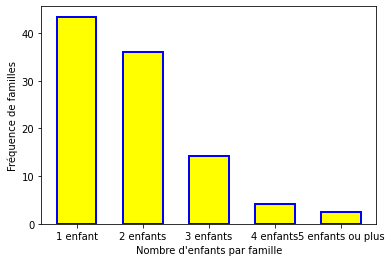

Le mode de la population de l'ensemble des familles en 1982 est : 1 enfant
###### 1990 #######
1 enfant | 43.79922573755173 %
2 enfants | 36.79081564544119 %
3 enfants | 14.190361767454279 %
4 enfants | 3.4574823121078633 %
5 enfants ou plus | 1.762114537444934 %


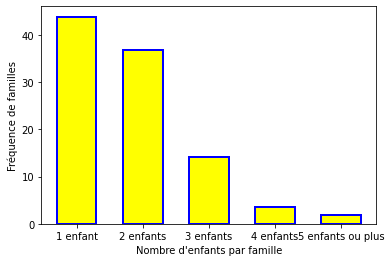

Le mode de la population de l'ensemble des familles en 1990 est : 1 enfant
###### 1999 #######
1 enfant | 44.71555675384201 %
2 enfants | 37.36856295497439 %
3 enfants | 13.588568347263413 %
4 enfants | 3.1005661903478026 %
5 enfants ou plus | 1.2267457535723916 %


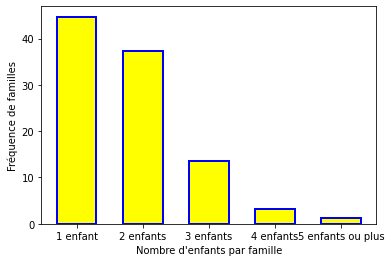

Le mode de la population de l'ensemble des familles en 1999 est : 1 enfant


In [13]:
populations = donnees.columns.values
labels = ['1 enfant', '2 enfants', '3 enfants', '4 enfants', '5 enfants ou plus']

# Création de la table/graphe des fréquences de chaque population
for pop in populations:
    print("######", pop, "#######")
    eff_total = donnees[pop][2]
    freq = {}
    i = 0
    freqmax = 0
    mode = "Aucun mode trouvé"
    # Affichage de la table de fréquence de la distribution (et calcule du mode)
    for eff in donnees[pop][3:8]:
        freq[labels[i]] = (eff / eff_total) * 100
        # Calcul du mode
        if freq[labels[i]] > freqmax:
            freqmax = freq[labels[i]]
            mode = labels[i]
        # Affichage d'une ligne de la table de fréquence
        print(labels[i], '|', freq[labels[i]],"%")
        i += 1
    # Affichage des fréquences de la distribution (diagramme en bâtons)
    plt.bar(range(5), freq.values(), width = 0.6, color = 'yellow', edgecolor = 'blue', linewidth = 2, capsize = 10)
    plt.xticks(range(5), freq.keys())
    plt.xlabel("Nombre d'enfants par famille", fontsize=10)
    plt.ylabel("Fréquence de familles", fontsize=10)
    plt.pause(0.5)
    print("Le mode de la population de l'ensemble des familles en {} est : {}".format(pop, mode))


### Question 3.2

In [14]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

for pop in populations:
    print("######", pop, "#######")
    moyenne, ecart_type = weighted_avg_and_std([1,2,3,4,6], weights=donnees[pop][3:8])
    print("Le nombre moyen d'enfants par famille en {} est : {}".format(pop, moyenne))
    print("L'écart-type de la population de l'ensemble des familles en {} est : {}\n\n".format(pop, ecart_type))


###### 1968 #######
Le nombre moyen d'enfants par famille en 1968 est : 2.1576923076923076
L'écart-type de la population de l'ensemble des familles en 1968 est : 1.3651354052093927


###### 1975 #######
Le nombre moyen d'enfants par famille en 1975 est : 2.027244244653317
L'écart-type de la population de l'ensemble des familles en 1975 est : 1.244661732946134


###### 1982 #######
Le nombre moyen d'enfants par famille en 1982 est : 1.8856917619235318
L'écart-type de la population de l'ensemble des familles en 1982 est : 1.0538360726989737


###### 1990 #######
Le nombre moyen d'enfants par famille en 1990 est : 1.8435455880389802
L'écart-type de la population de l'ensemble des familles en 1990 est : 0.9877527577807593


###### 1999 #######
Le nombre moyen d'enfants par famille en 1999 est : 1.7998112698840658
L'écart-type de la population de l'ensemble des familles en 1999 est : 0.9291220003482421




Le nombre de familles nombreuses diminuant, la dispersion autour de la valeur moyenne diminue.